

---



---

#  Linear SVM Classification

---



---

**Linear SVM Classification** is a powerful machine learning algorithm used for binary classification tasks. It works by finding the hyperplane that best separates the classes in the feature space. The goal is to maximize the margin, which is the distance between the hyperplane and the closest data points (support vectors). This method is effective even in high-dimensional spaces and is particularly useful when the data is linearly separable.

In this notebook, we will apply Linear SVM Classification to the iris dataset. Additionally, we will explore soft margin classification. Finally, there will be an extra practice section for further learning.

## Load the Dataset
This code loads the `Iris dataset` and selects only the setosa and versicolor classes for binary classification. It retains only the petal length and petal width features for the analysis.

In [1]:
from sklearn.svm import SVC
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # Consider only petal length and petal width features
y = iris["target"]

# Select only setosa and versicolor classes for binary classification
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


#Model Setup
This code trains a linear Support Vector Machine (SVM) classifier with a regularization parameter `C=1.0` using the petal length and petal width features from the Iris dataset.

`SVC` (Support Vector Classifier) is part of the SVM (Support Vector Machines) family in scikit-learn, used extensively for classification problems. It shines in high-dimensional spaces and for cases where the number of dimensions exceeds the number of samples. The `kernel="linear"` parameter specifies that a linear hyperplane should be used to separate the classes, making it suitable for linearly separable data. The regularization parameter `C=1.0` controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights, with higher values leading to models that may fit the training data better but might also overfit.

For more details on configuring and using `SVC`, visit the [`SVC documentation`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).


In [2]:
# Train a linear SVM classifier with regularization parameter C=1.0
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X, y)

SVC(kernel='linear')

This code defines the decision boundaries of three "bad" models and plots them alongside the decision boundary of a trained SVM classifier on the iris dataset.

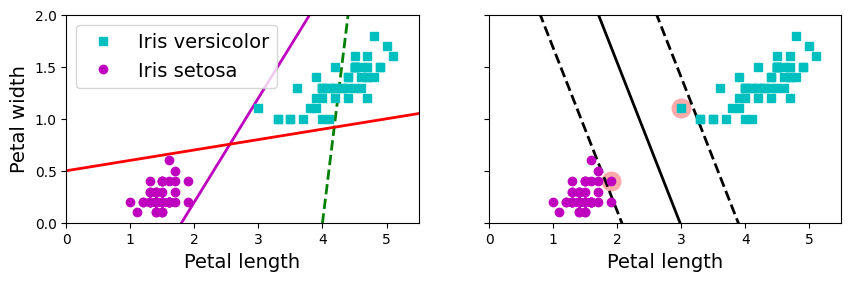

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the decision boundaries of bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Plotting the decision boundaries of bad models
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "cs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "mo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "cs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "mo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


This code defines a dataset and labels, creates an SVM classifier with a linear kernel and high regularization, and plots the dataset before and after scaling, showing the decision boundary in both cases.

(-2.0, 2.0, -2.0, 2.0)

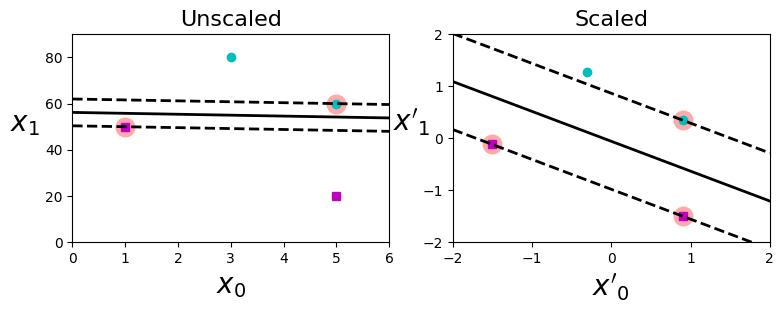

In [4]:
# Define the dataset and labels
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# Create an SVM classifier with a linear kernel and a high regularization parameter
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

# Plot the dataset before and after scaling
plt.figure(figsize=(9,2.7))

# Plot unscaled data with decision boundary
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "co")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# Scale the data and plot with decision boundary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "co")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])



#Soft Margin Classification
**Soft margin classification** extends the concept of SVMs by allowing for misclassifications and outliers. It introduces a regularization parameter (C) to balance between maximizing the margin and minimizing misclassifications.


This code generates two datasets, each with outliers, and trains a linear SVM classifier on the second dataset with outliers. It then plots both datasets along with their outliers and decision boundaries.

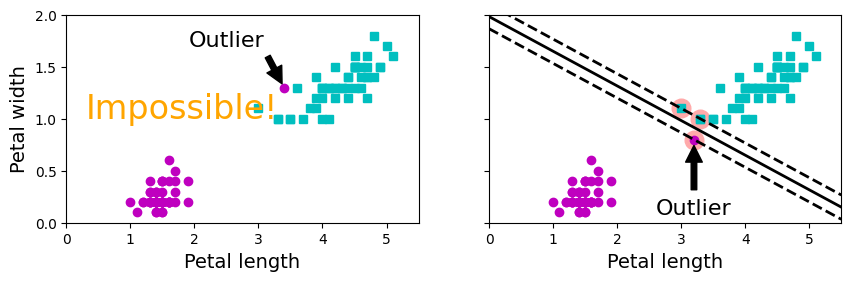

In [5]:
# Generate two datasets with outliers
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])  # Outlier points
y_outliers = np.array([0, 0])  # Labels for outlier points
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)  # Dataset 1 with one outlier
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)  # Dataset 2 with another outlier
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

# Train a linear SVM classifier on dataset 2 with outliers
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

# Plot the datasets with outliers and the decision boundaries
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "cs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "mo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="orange")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "cs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "mo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()


#Practices

This code loads the Iris dataset, selects petal length and petal width features, and labels only Iris virginica flowers. It then creates a pipeline for feature scaling using StandardScaler and linear SVM classification using LinearSVC. Finally, it trains the SVM classifier using the fit() method.
- Create Pipeline

In [6]:
# Importing  libraries
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Loading the Iris dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# Creating a pipeline for preprocessing and linear SVM classification
svm_clf = Pipeline([
    ("scaler", StandardScaler()),        # Feature scaling
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),  # Linear SVM classifier
])

# Training the SVM classifier
svm_clf.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

This code creates two instances of LinearSVC classifiers with different regularization strengths (`C=1` and `C=100`). It then creates pipelines for feature scaling using StandardScaler and linear SVM classification using the defined classifiers. Finally, it trains the scaled SVM classifiers using the fit() method.

In [9]:
# Creating a StandardScaler instance
scaler = StandardScaler()

# Defining LinearSVC classifiers with different regularization strengths
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

# Creating Pipelines for scaled LinearSVC classifiers
scaled_svm_clf1 = Pipeline([
    ("scaler", scaler),        # Feature scaling
    ("linear_svc", svm_clf1),  # Linear SVM classifier with C=1
])
scaled_svm_clf2 = Pipeline([
    ("scaler", scaler),        # Feature scaling
    ("linear_svc", svm_clf2),  # Linear SVM classifier with C=100
])

# Training the scaled LinearSVC classifiers
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

This code converts the scaled parameters back to unscaled parameters for two SVM classifiers (`svm_clf1` and `svm_clf2`). It then manually finds support vectors for each classifier since LinearSVC does not automatically find them.

In [10]:
# Converting scaled parameters back to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

# Setting intercepts and coefficients for unscaled parameters
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Finding support vectors manually (LinearSVC does not automatically find them)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]


This code plots decision boundaries for two SVM classifiers with different regularization strengths (`C=1` and `C=100`) along with Iris virginica and Iris versicolor data points from the Iris dataset.

(4.0, 5.9, 0.8, 2.8)

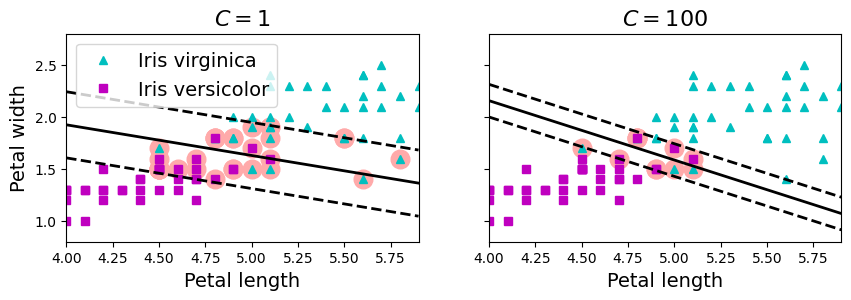

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# Plot for the first SVM classifier
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "c^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

# Plot for the second SVM classifier
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "c^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ms")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

